Exploratory Data Analysis - Movie Industry Data Set

In [2]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [3]:
# Now read the csv file 
df = pd.read_csv( r'C:\Users\Punnaiah jvs\OneDrive\Desktop\SQL\random datasets\movies.csv')

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [6]:
# Finding nan values in coulmns

df.isnull().sum(axis = 0)



name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [5]:
#Replace Nan values 
for col in df:
    df[col].fillna(0, inplace=True)
 



In [7]:
# Changing columns data types

df = df.astype({'votes': 'int64' ,'budget' : 'int64', 'gross' : 'int64', 'runtime': 'int64' })

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [10]:
#cleaning the 'released' column by split it into two new columns

df[['date_released', 'Region_state']] = df['released'].astype(str).str.split("(", expand = True)
df['date_released'] = df['date_released'].str[:-1]
df['Region_state'] = df['Region_state'].str[:-1]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,Region_state,date_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States,"July 25, 1980"


In [11]:
# separating  date and year

df[['date_released', 'year_released']] = df['date_released'].astype(str).str.split(", ", expand = True)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,Region_state,date_released,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States,June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States,July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States,July 25,1980


In [17]:
# Hnadling with duplicates

df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Region_state,date_released,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,United States,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,United States,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,United States,June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,United States,July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,United States,July 25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,United States,October 23,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,United States,February 7,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,Cameroon,April 27,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,United States,October 1,2020


In [21]:
#Renaming a column
df. rename( columns={'Region_state' : 'Region' } ,inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Region,date_released,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,United States,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,United States,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,United States,June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,United States,July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,United States,July 25,1980


In [23]:
# Test Cases:
# With gross --> (budget, genre, company) => has strong correlation 

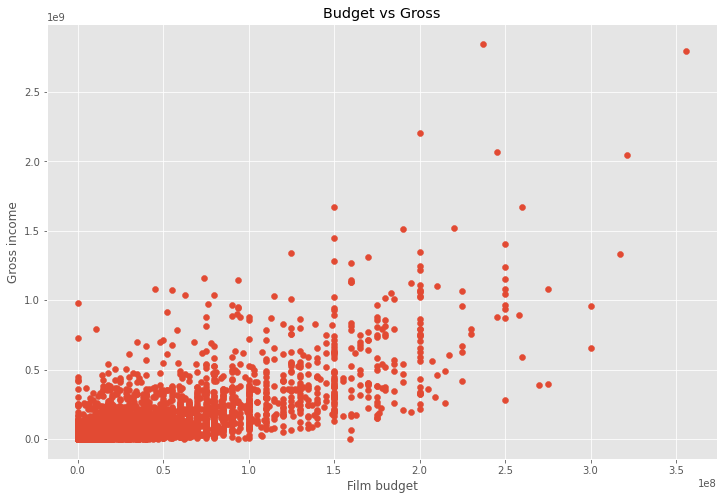

In [24]:
#scatter plot of budget vs gross

plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Film budget')
plt.ylabel('Gross income')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

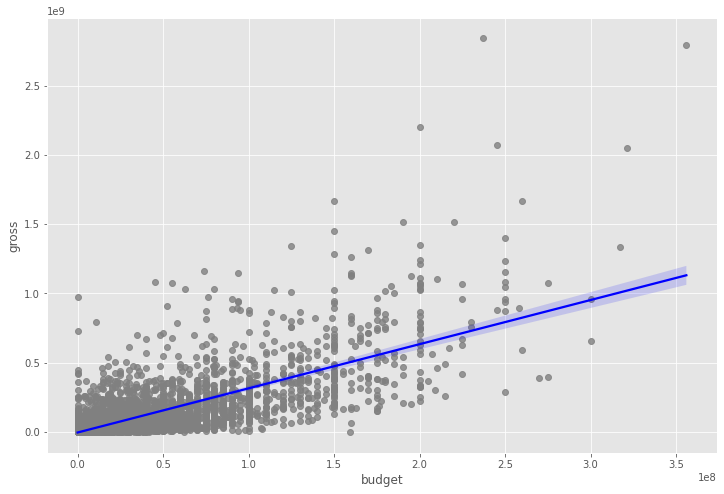

In [26]:
#regression plot

sns.regplot(x= 'budget', y= 'gross', data = df, scatter_kws={'color':'grey'}, line_kws={'color':'blue'})

In [27]:
#finding correlation. Method; pearson, kendall, spearman. Peason is the default

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


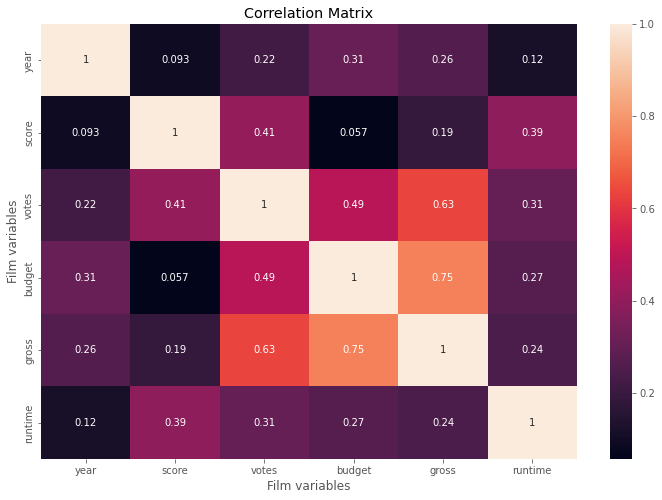

In [28]:
#create heatmap

corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Film variables')
plt.ylabel('Film variables')

plt.show()

In [29]:
#For correlation, string or object data types must be changed to categorical value

df_catt = df

for col_names in df_catt.columns:
    if(df_catt[col_names].dtype == 'object'):
        df_catt[col_names] = df[col_names].astype('category')
        df_catt[col_names] = df[col_names].cat.codes

df_catt.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Region,date_released,year_released
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146,56,211,0
1,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104,56,187,0
2,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124,56,222,0
3,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88,56,187,0
4,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98,56,193,0


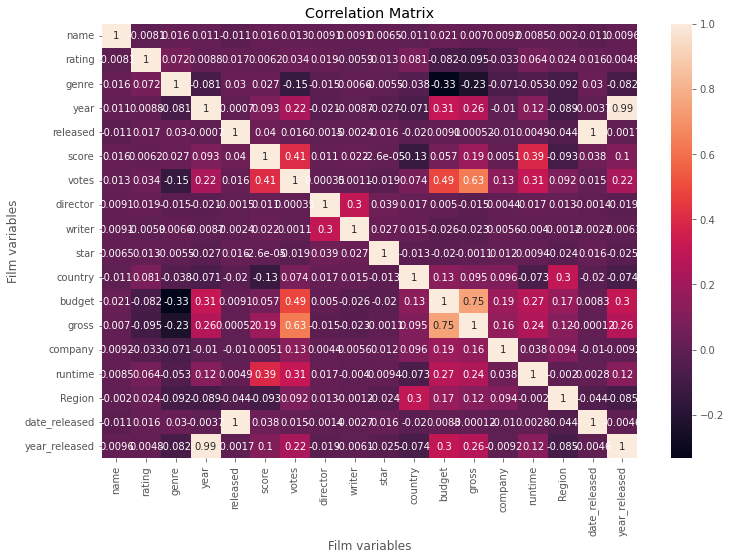

In [30]:
#new heatmap, including new categorical values

corr_matrix2 = df_catt.corr(method='pearson')

sns.heatmap(corr_matrix2, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Film variables')
plt.ylabel('Film variables')

plt.show()

In [31]:
#unstack and sort correlation

sorted_pairs = corr_matrix2.unstack().sort_values()

sorted_pairs

genre          budget          -0.334021
budget         genre           -0.334021
gross          genre           -0.234297
genre          gross           -0.234297
votes          genre           -0.145296
                                  ...   
company        company          1.000000
genre          genre            1.000000
year_released  year_released    1.000000
country        country          1.000000
Region         Region           1.000000
Length: 324, dtype: float64

In [32]:
#Finding high correlation between two variables

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes          gross            0.632870
gross          votes            0.632870
               budget           0.750157
budget         gross            0.750157
year           year_released    0.992136
year_released  year             0.992136
date_released  released         0.999767
released       date_released    0.999767
year           year             1.000000
rating         rating           1.000000
score          score            1.000000
date_released  date_released    1.000000
name           name             1.000000
gross          gross            1.000000
released       released         1.000000
director       director         1.000000
votes          votes            1.000000
writer         writer           1.000000
star           star             1.000000
runtime        runtime          1.000000
budget         budget           1.000000
company        company          1.000000
genre          genre            1.000000
year_released  year_released    1.000000
country        c

In [ ]:
#Budget has strong correlation with gross = TRUE
#genre has strong correlation with gross = FALSE
#company has strong correlation with gross = FALSE